# Analisis de un Dataset dado

El objetivo del presente trabajo es resolver un problema típico de análisis de datos, utilizando algunas herramientas.

En la resolución se deberán utilizar todas las herramientas vistas durante el curso de la UTN de Cordoba, a fin de evaluar la comprensión de las mismas y la correcta utilización de herramientas y técnicas vistas.

## Enunciado

Se utilizará para el trabajo un set de datos correspondiente a los viajes realizados por el servicio de Taxis de la ciudad de Nueva York.

Cada punto a resolver se colocará en una sección aparte debajo de la cual se encuentra la celda en la que se colocará el código correspondiente a la resolución del tema pedido.

Se pueden agregar mas celdas en pos de la claridad en el planteo o para generar resultados intermedios.

### Importación inicial y carga de datos (NO MODIFICAR)

In [ ]:
import seaborn as sns
import pandas as pd
sns.set(style='darkgrid')

"""
NO MODIFICAR ESTAS LINEAS.
SON LAS RESPONSABLES DE CARGAR LOS DATOS
Y RENOMBRAR LAS COLUMNAS, PARA REALIZAR LOS ANÁLISIS
"""
df = sns.load_dataset("taxis")
df = df.rename(columns={
    'pickup':'fecha_hora_subida',
    'dropoff':'fecha_hora_bajada',
    'passengers':'pasajeros',
    'distance':'distancia',
    'fare':'tarifa',
    'tip':'propina',
    'tolls':'peajes',
    'payment':'pago',
    'pickup_zone':'zona_subida',
    'dropoff_zone':'zona_bajada',
    'pickup_borough':'barrio_subida',
    'dropoff_borough':'barrio_bajada'})
df['fecha'] = df['fecha_hora_subida'].dt.date # Crear una columna que contenga solamente fecha, sin hora
df['hora_subida'] = df['fecha_hora_subida'].dt.time
df['hora_bajada'] = df['fecha_hora_bajada'].dt.time
df['duracion'] = df['fecha_hora_bajada']-df['fecha_hora_subida']

In [ ]:
# df['barrio_subida'].unique()
#df.info()
# df.describe()
df.head(1
        )

,fecha_hora_subida,fecha_hora_bajada,pasajeros,distancia,tarifa,propina,peajes,total,color,pago,...,zona_bajada,barrio_subida,barrio_bajada,fecha,hora_subida,hora_bajada,duracion,hora,fechaHora,fecha2
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.6,7.0,2.15,0.0,12.95,yellow,credit card,...,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23,20:21:09,20:27:24,0 days 00:06:15,20,2019-03-23 20:21:09,2019-03-23


### Describir el set de datos y mostrar algunos indicadores estadísticos relevantes

In [ ]:
# Colocar el código debajo de este comentario
'''
En este set de datos se muestran la cantidad de pasajeros por viajes y todavia no se puedee observar si
a mas pasajeros la propina es mas grande (por ejemplo).
En principio se puede observar que las millas recorridas no son extensas.
En princpio los viajes son cortos y se pude apreciar con el maximo de tiempo que duro un viaje.
'''

# Tomo esta breve interpretacion de:
df.describe()


### Viajes por tipo de Taxi

La ciudad cuenta con Taxis de dos tipos (yellow,green). Indicar cuántos viajes se realizaron por cada tipo. Graficar.

In [ ]:
# Viajes por tipo. Total por tipo y graficar.
tipoColor = df.groupby(["color"])["pasajeros"].count()
print(tipoColor)
sb = sns.countplot(x=tipoColor)

In [ ]:
#Otra forma de graficar lo mismo. Solo que aqui tomo la cantidad de viajes con la cantidad de pasajeros por viaje.

tipoColor = df.groupby(["color"])["pasajeros"].count()
print(tipoColor)
sb = sns.countplot(x="color", hue= "pasajeros", data=df)

### Otros indicadores, por tipo de Taxi

Indicar cual es la distancia promedio, la tarifa máxima, mínima y promedio de cada tipo de Taxi.

In [ ]:
# Distancia promedio
distanciaProm = pd.DataFrame(df.groupby(by='color')['distancia'].mean())
print(round(distanciaProm, 2))
print("---------------------------")
# Tarifa Maxima
tarifaMax = pd.DataFrame(df.groupby(by='color')['tarifa'].max())
print(tarifaMax)
print("---------------------------")
# Tarifa minima
tarifaMin = pd.DataFrame(df.groupby(by='color')['tarifa'].min())
print(tarifaMin)
# Promedio de cada tipo de taxi
print("---------------------------")
promTipo = pd.DataFrame(df.groupby(by='color').mean())
print(round(promTipo, 2))
print("---------------------------")

### Tipos de pago

Indicar cual es el tipo de pago más utilizado, y cual es el monto promedio (sacado de la columna `total`) cobrado por cada tipo de pago.

In [ ]:
# Tipo de pago mas usado
print("---------------------------")
tipoPago = df.groupby(by='pago')['pasajeros'].count()
print(tipoPago)
print("Aqui se muestra en valores totales cual es el pago mas utilizado por los pasajeros")
print("---------------------------")
# Promedio total (sobre la columna "total") por cada tipo de pago
promTotal = df.groupby(by='pago')['total'].mean()
print(round(promTotal, 2))

### Origenes y destinos

Indicar cuántos viajes hay por cada ciudad (`barrio_subida`) y por cada zona (`zona_subida`)

Determinar, del total de viajes, cuántos son dentro del mismo barrio y cuántos son entre barrios diferentes.

In [ ]:
print("Viajes por barrio_subida")
print("---------------------------")
barrioSubida = df.groupby(by='barrio_subida')['pasajeros'].count()
print(barrioSubida)
print("---------------------------")
print("Viajes por zona_subida")
zonaSubida = df.groupby(by='zona_subida')['pasajeros'].count()
print(zonaSubida)
print("---------------------------")
print("Total de viajes dentro del barrio")
# barriosubida == barriobajada
barrioIgual = df[df['barrio_subida'] == df['barrio_bajada']]
conteoBarrio = barrioIgual.groupby('barrio_subida')['pasajeros'].count()
print(conteoBarrio)
print("---------------------------")
# Total de viajes entre barrios diferentes
barrioDesigual = df[df['barrio_subida'] != df['barrio_bajada']]
conteoBarrio2 = barrioDesigual.groupby('barrio_subida')['pasajeros'].count()
print(f"La cantidad de viajes a barrios diferentes es de: {sum(conteoBarrio2)}")

### Evolución de viajes durante el día

Indicar gráficamente cómo se distribuyen los viajes a lo largo de 24 horas (usar la columna `hora_subida`)

In [ ]:
# Grafico distribucion de viajes en 24 horas. (columna "hora_subida")

df["hora"] = pd.to_datetime(df["fecha_hora_subida"]).dt.hour
sns.countplot(x="hora", data=df)

### Evolución de la facturación en el tiempo

Indicar gráficamente como evoluciona la facturación (total por día) a lo largo del tiempo (usar las fechas ordenadas ascendente)

In [ ]:
# Grafico evolucion facturacion
# Total por dia
# Fechas en orden ascendente

df["fechaHora"] = pd.to_datetime(df["fecha_hora_subida"])
df["fecha2"] = df["fechaHora"].dt.date
totalXDia = df.groupby("fecha2")["total"].sum()
orderBy = df.sort_values("fecha2")
sns.lineplot(x="fecha2", y="total", data=orderBy)

### Costo de la tarifa

Determinar el costo promedio por milla de los viajes realizados en Manhattan.

In [ ]:
# Costo promedio por milla en Manhattan
# millas/tarifa==costo

prom = df.loc[
    (df['barrio_subida'] == 'Manhattan')
    &
    (df['barrio_bajada'] == 'Manhattan')
    &
    (df['tarifa'] >= 0.1)
    &
    (df['distancia'] >= 0.1)
]['tarifa'].mean()

print(f"El precio por milla en Manhattan es de {round(prom, 2)} dolares")

El precio por milla en Manhattan es de 9.71 dolares


### La mejor zona...

¿En qué zona debería circular un Taxi para tener posibilidades de recibir propinas altas? (utilizar la columna `zona_subida`)

In [ ]:
# Zona de propina mas alta ("zona_subida")
propinaXLugar = df.groupby("zona_subida")["propina"].mean()
mejoresLugares = pd.DataFrame(propinaXLugar.sort_values(ascending=False).head(5))
print(mejoresLugares)

### Pero sólo de día...

Mejorar el caso anterior, teniendo en cuenta que el chofer solamente quiere trabajar entre las 8:00 y las 16:00 hs. ¿Se mantiene la misma zona o le conviene trabajar en otra zona?

In [ ]:
# De la anterior, mejor zona entre las 8 y las 16
# df[df["B"] > 5].groupby("A")

df2 = df[(df["hora"] > 8) & (df["hora"] < 16)].groupby("zona_subida")["propina"].mean()
df3 = pd.DataFrame(df2.sort_values(ascending=False).head(5))

print("Antes elejimos los mejores lugares para ganar propina, voy a tomar los mejores 5 lugares:")
print(round(mejoresLugares, 2))
print("----------------------")
print("Ahora vamos a tomar los 5 mejores lugares entre las 8 y 16: ")
print(round(df3, 2))
print("----------------------")
print("Entre esos horarios le conviene trabajar en otras zonas.")

### Correlación

Graficar la correlación entre las siguientes variables:

* Pasajeros
* Distancia
* Tarifa
* Propina

¿Podemos sacar alguna conclusión a partir del gráfico?

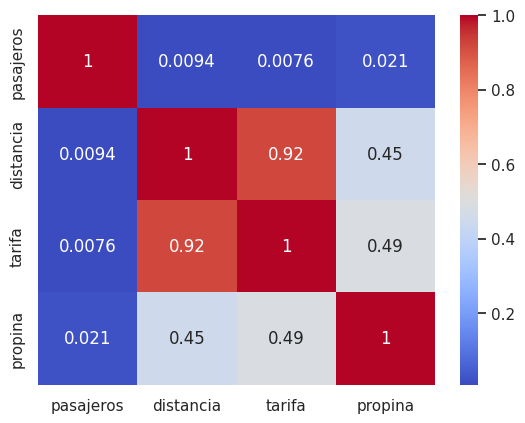

In [ ]:
import matplotlib.pyplot as plt

dfGrafico = ["pasajeros", "distancia", "tarifa", "propina"]
correlacion = df[dfGrafico].corr()
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.show()
#Si. Se puede. Por ejemplo que la propina a varia segun el orden. Que se paga mas prpina segun la tarifa que por la cantidad de pasajeros
# Se puede observar que los pasajeros ahorran en viajes largos entre varios